# **Importing required packages**

In [1]:
#import the packeges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.compose import ColumnTransformer

In [2]:
#Reading the data into python
data_train = pd.read_csv('../input/titanic/train.csv')
data_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
submit=data_test

In [4]:
len(submit)

418

In [5]:
print(len(data_train) , len(data_test))

891 418


In [6]:

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#checking the missing value for the training data
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Handling missing value**

In [10]:

data_train = data_train.drop(columns='Cabin', axis=1)

In [11]:
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)

In [12]:
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)

In [13]:
#checking the missing value for the training data
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#checking the missing value for the testing data 
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
data_test = data_test.drop(columns='Cabin', axis=1)
data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].mean(), inplace=True)

In [16]:
#checking the missing value for the testing data 
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
len(data_test)

418

In [18]:
# Looking at the descriptive statistics of the data
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


# **Data Visualization** 

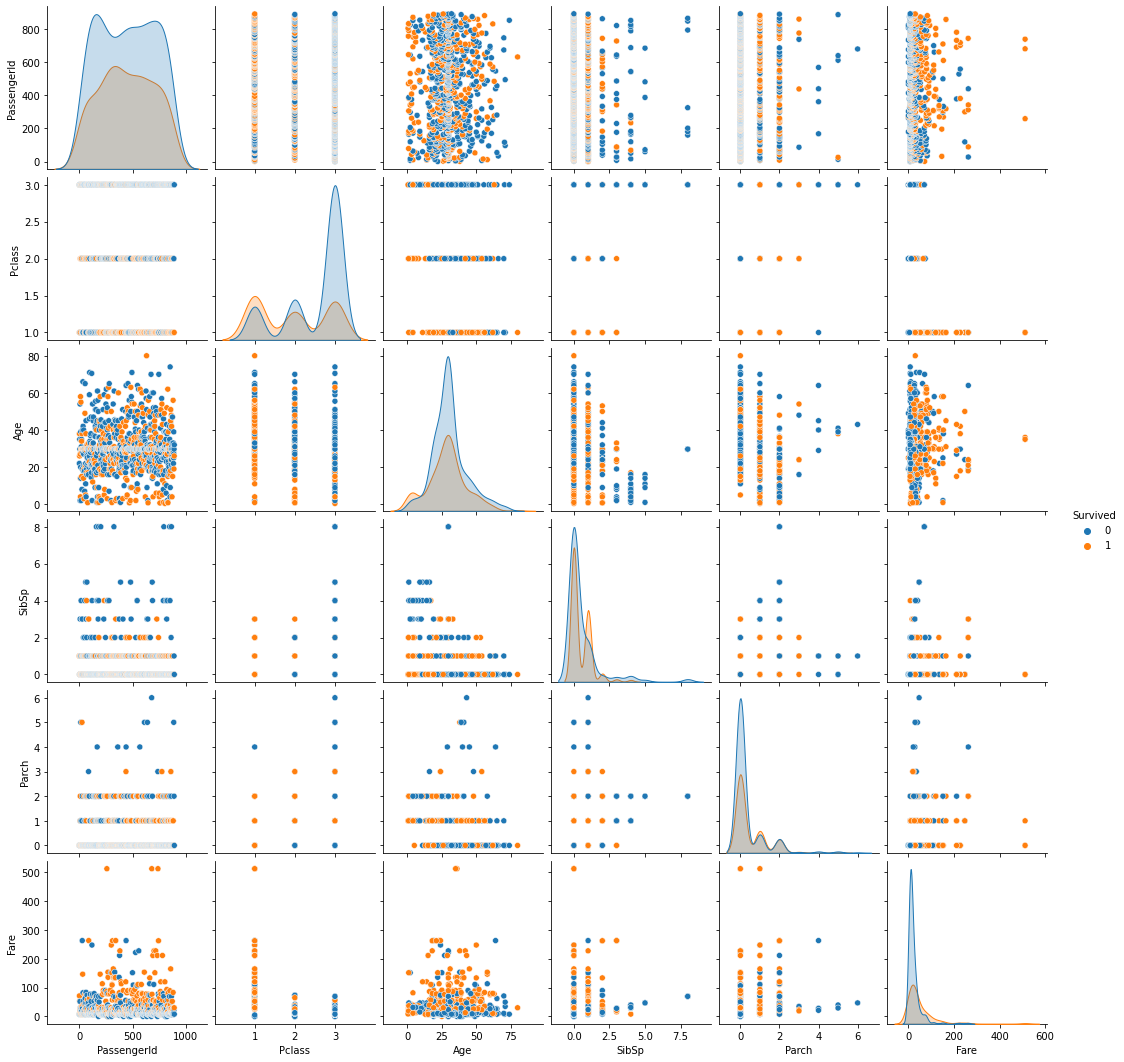

In [19]:
sns.pairplot(data_train, hue='Survived')

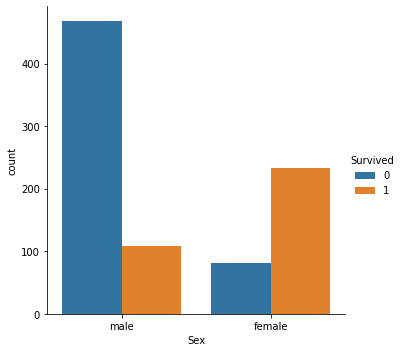

In [20]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = data_train)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

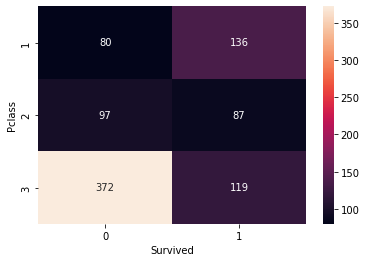

In [21]:

# Group the dataset by Pclass and Survived and then unstack them
group = data_train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

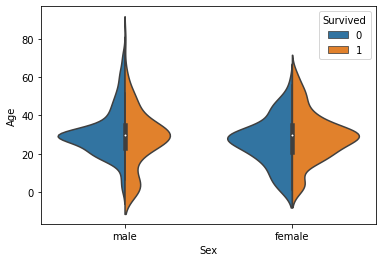

In [22]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = data_train, split = True)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

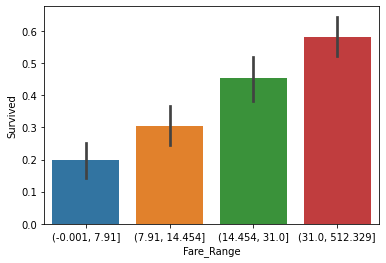

In [23]:
# Divide Fare into 4 bins
data_train['Fare_Range'] = pd.qcut(data_train['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',data = data_train)

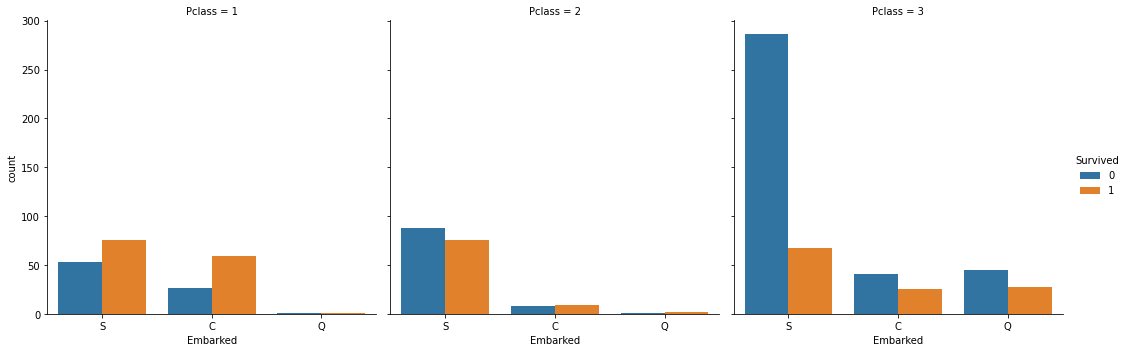

In [24]:

# Countplot
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = data_train)

In [25]:
linear_vars = data_train.select_dtypes(include=[np.number]).columns
cat_attribs = list(data_train.select_dtypes(exclude=[np.number]).columns)

In [26]:
def plot_boxplot(df, ft):
    sns.boxplot(df[ft])
    

<Figure size 1296x648 with 0 Axes>

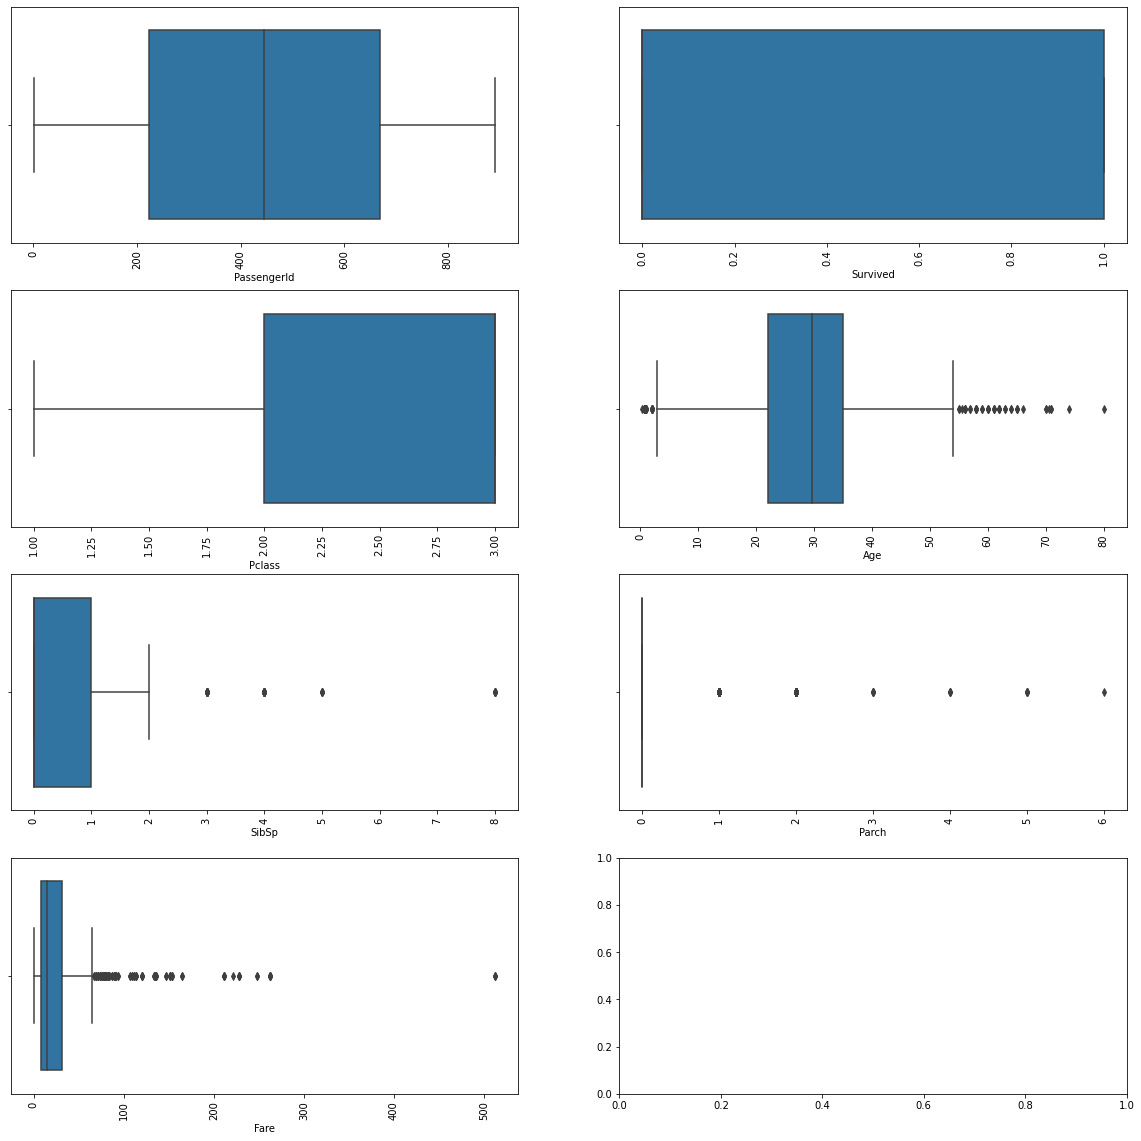

In [27]:
fig = plt.figure(figsize=(18, 9))

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for variable, subplot in zip(linear_vars, ax.flatten()):
    sns.boxplot(x=data_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# ****remove outliers****

In [28]:
#define function to remove outliers
def  outliers(df , ft ):
    
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3 - Q1
    # Upper bound
    upper = Q3+1.5*IQR
    # Lower bound
    lower = Q1-1.5*IQR

    ls=df.index[(df[ft] < lower) | (df[ft] > upper)]
    return ls 
    

In [29]:
#create empty list to store the list index

index_list=[]
for feature in linear_vars :
    index_list.extend(outliers(data_train , feature ))

In [30]:
len(index_list)

441

In [31]:
def remove(df, ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [32]:
data_train= remove(data_train , index_list)

In [33]:
data_train.shape

(577, 12)

# **Feature Selection & Data Split**

In [34]:
data_train.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.268890
SibSp          0.097999
Age            0.006573
PassengerId   -0.050556
Pclass        -0.242189
Parch               NaN
Name: Survived, dtype: float64

In [35]:
linear_vars

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [36]:
X = data_train.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y=data_train['Survived']

In [37]:
data_test=data_test.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [38]:
len(data_test)

418

In [39]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [40]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['Sex', 'Embarked'], dtype='object')

In [41]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [42]:
#split the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [43]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Range
784,3,male,25.000000,0,0,7.0500,S,"(-0.001, 7.91]"
687,3,male,19.000000,0,0,10.1708,S,"(7.91, 14.454]"
376,3,female,22.000000,0,0,7.2500,S,"(-0.001, 7.91]"
579,3,male,32.000000,0,0,7.9250,S,"(7.91, 14.454]"
713,3,male,29.000000,0,0,9.4833,S,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...
347,3,female,29.699118,1,0,16.1000,S,"(14.454, 31.0]"
411,3,male,29.699118,0,0,6.8583,Q,"(-0.001, 7.91]"
715,3,male,19.000000,0,0,7.6500,S,"(-0.001, 7.91]"
363,3,male,35.000000,0,0,7.0500,S,"(-0.001, 7.91]"


# **Modeling**

In [44]:

# Building pipelins of  processor and model for varios regressors.

#pipline for linear regression model
pipeline_lr=Pipeline([("preprocessor",preprocessor),
                     ("lr_reg",LogisticRegression())])

#pipline for Decision Tree Regressor
pipeline_dt=Pipeline([("preprocessor",preprocessor),
                     ("dt_reg",DecisionTreeClassifier())])

#pipline for Random Forest Regressor/
pipeline_rf=Pipeline([("preprocessor",preprocessor),
                     ("rf_reg",RandomForestClassifier())])


#pipline for KNeighbors Regressor
pipeline_kn=Pipeline([("preprocessor",preprocessor),
                     ("rf_reg",KNeighborsClassifier())])

#pipline for Suport Vector  Regressor
pipeline_svm=Pipeline([("preprocessor",preprocessor),
                     ("svm_reg",SVC())])


In [45]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_svm ]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LogicticRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "Support Vector"}


In [46]:
# Fit  all  pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [47]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s : %f " % (pipe_dict[i], cv_score.mean()))

LogicticRegression : -0.429322 
DecisionTree : -0.501284 
RandomForest : -0.449814 
KNeighbors : -0.463803 
Support Vector : -0.437665 


In [48]:
pred = pipeline_lr.predict(X_test)
pipeline_lr.score(X_test,y_test)

0.7655172413793103

# **Fine-Tune Your Model**

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
param_grid = { 
    'lr_reg__C': np.logspace(-3,3,7),
    'lr_reg__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'lr_reg__penalty':['l1','l2']}
grid_search = GridSearchCV(pipeline_lr,param_grid,cv = 10, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Sex', 'Embarked'], dtype='object'))])),
                                       ('lr_reg', Logisti

In [51]:
search_score = cross_val_score(grid_search,
                               X_train,
                               y_train,
                               scoring="neg_mean_squared_error",
                               cv=10)
search_rmse_score=np.sqrt(-search_score)
print("Scores: ", search_rmse_score)
print("Mean: ", search_rmse_score.mean())
print("Standard Deviation: ", search_rmse_score.std())

Scores:  [0.45226702 0.39886202 0.52827054 0.48224282 0.43133109 0.52827054
 0.26413527 0.43133109 0.40347329 0.34099717]
Mean:  0.4261180863889934
Standard Deviation:  0.07713496945933851


# Analyze the Best Models and Their Errors

In [52]:
grid_search.best_params_

{'lr_reg__C': 0.1, 'lr_reg__penalty': 'l2', 'lr_reg__solver': 'liblinear'}

In [53]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)

nan {'lr_reg__C': 0.001, 'lr_reg__penalty': 'l1', 'lr_reg__solver': 'newton-cg'}
nan {'lr_reg__C': 0.001, 'lr_reg__penalty': 'l1', 'lr_reg__solver': 'lbfgs'}
0.5313630802421236 {'lr_reg__C': 0.001, 'lr_reg__penalty': 'l1', 'lr_reg__solver': 'liblinear'}
0.5313630802421236 {'lr_reg__C': 0.001, 'lr_reg__penalty': 'l2', 'lr_reg__solver': 'newton-cg'}
0.5313630802421236 {'lr_reg__C': 0.001, 'lr_reg__penalty': 'l2', 'lr_reg__solver': 'lbfgs'}
0.5 {'lr_reg__C': 0.001, 'lr_reg__penalty': 'l2', 'lr_reg__solver': 'liblinear'}
nan {'lr_reg__C': 0.01, 'lr_reg__penalty': 'l1', 'lr_reg__solver': 'newton-cg'}
nan {'lr_reg__C': 0.01, 'lr_reg__penalty': 'l1', 'lr_reg__solver': 'lbfgs'}
0.5313630802421236 {'lr_reg__C': 0.01, 'lr_reg__penalty': 'l1', 'lr_reg__solver': 'liblinear'}
0.5023201980762358 {'lr_reg__C': 0.01, 'lr_reg__penalty': 'l2', 'lr_reg__solver': 'newton-cg'}
0.5023201980762358 {'lr_reg__C': 0.01, 'lr_reg__penalty': 'l2', 'lr_reg__solver': 'lbfgs'}
0.48590057187713676 {'lr_reg__C': 0.01, 

# Evaluate Your Model

In [54]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)


In [55]:
from sklearn.metrics import classification_report

In [56]:

print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        94
           1       0.85      0.45      0.59        51

    accuracy                           0.78       145
   macro avg       0.81      0.70      0.72       145
weighted avg       0.79      0.78      0.76       145



In [57]:

prediction=final_model.predict(data_test)

In [58]:
my_submission = pd.DataFrame({'PassengerId': submit.PassengerId, 'Survived': prediction})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)